In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

Dataset:

In [50]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [51]:
print('Tensor de dimensión ',x_train.ndim)
print('Shape ',x_train.shape)
print('Tensor de dimensión ',y_train.ndim)
print('Shape ',y_train.shape)

Tensor de dimensión  3
Shape  (60000, 28, 28)
Tensor de dimensión  1
Shape  (60000,)


In [52]:
print('Tensor de dimensión ',x_test.ndim)
print('Shape ',x_test.shape)
print('Tensor de dimensión ',y_test.ndim)
print('Shape ',y_test.shape)

Tensor de dimensión  3
Shape  (10000, 28, 28)
Tensor de dimensión  1
Shape  (10000,)


El set de datos corresponde a número escritos a mano compuesto en imagenes de 28 pixeles por 28 pixeles. Cada foto tiene su respectiva clase, las cuales son 10, clases que indican cuál es el número de la imagen. Los números van del 0 al 9.

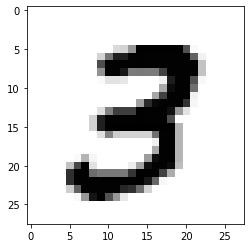

In [53]:
#Visualizacion de algun elemento de entrenamiento
plt.imshow(x_train[7],cmap=plt.cm.binary)

In [54]:
x_train[8].shape

(28, 28)

Tensor conformado por 60.000 imagenes donde cada imagen se compone de una matriz de 28x28 pixeles. La información de los pixeles corresponde a un único canal RGB por lo cual los colores están en escala de grises con números que van desde 0 a 255.

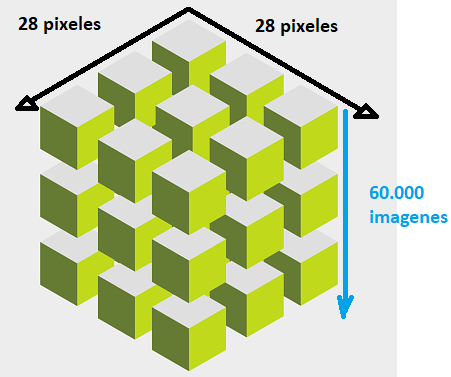

In [55]:
#Normalizamos los valores dividiendo sobre 255
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train/=255
x_test/=255

La idea es que el modelo se construya a partir de una regresión lineal multiple donde se tendran que estimar 784 parametros más el parametro de sesgo por cada clase. En total la red tendría estimar 7850 parametros más los parametros de salida que serían 110 (10 estimadores por 10 clases más 10 sesgos).

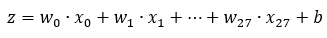

El paso siguiente es reformar los tensores. La red neuronal se alimentará de tensores 2D

In [56]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

## One hot encoding

Vamos a convertir las clases en valores binarios, cada clase se compondrá de un vector de 10 posiciones en las cuales solo contendrá el valor 1 la posición equivalente a la clase, las demás serán ceros.

**ejemplo:** Clase 9 sería [0,0,0,0,0,0,0,0,1]

In [57]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train,num_classes =10)
y_test = to_categorical(y_test,num_classes =10)

In [58]:
print('Tensor de dimensión ',y_train.ndim)
print('Shape ',y_train.shape)
print('Tensor de dimensión ',y_test.ndim)
print('Shape ',y_test.shape)

Tensor de dimensión  2
Shape  (60000, 10)
Tensor de dimensión  2
Shape  (10000, 10)


# Definición Modelo

Se define la capa de entrada y la de salida

In [59]:
from keras.models import Sequential
from keras.layers import Activation, Dense

model = Sequential()
model.add(Dense(784,activation='sigmoid',input_shape=(784,)))
model.add(Dense(10,activation='softmax'))

La primera capa se compone de 10 neuronas por los cuales pasarán cada uno de los 784 pixeles de cada imagen de entrenamiento. Esta cama se activa con la función sigmoide en la cual se hace una clasificación binaria.

La segunda capa se compone de 10 neuronas que se activas con la función softmax la cual hace una clasificación multiple, como valores de salida retornará un vector de 10 posiciones conformadas por las probabilidades de pertenecer a cada clase. La clase de mayor probabilidad definirá el número de la imagen.

In [60]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 784)               615440    
                                                                 
 dense_5 (Dense)             (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


Se determina la función de coste, el optimizador y la metrica de precisión del modelo.

In [61]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [62]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 1.2632 - accuracy: 0.7215
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6048 - accuracy: 0.8572
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4732 - accuracy: 0.8767
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4185 - accuracy: 0.8862
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3876 - accuracy: 0.8921


Procedemos a evaluar el modelo

In [63]:
#La precisón se calcula mediante una matriz de confusión
test_loss, test_acc = model.evaluate(x_test,y_test)
print('Accuracy: ',test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.3579 - accuracy: 0.9003
Accuracy:  0.9003000259399414


In [64]:
from sklearn.metrics import confusion_matrix

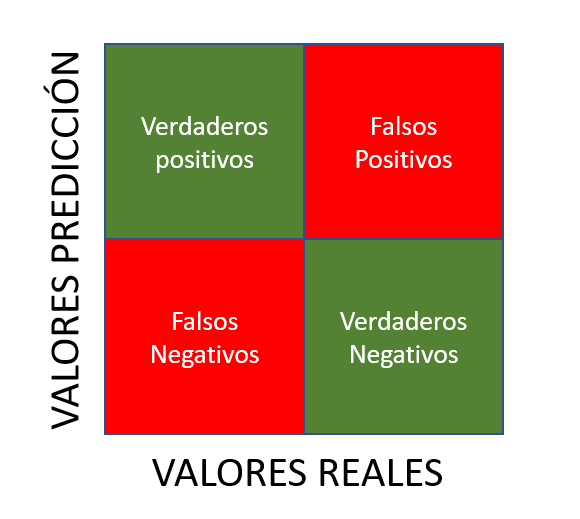

Existen otras metricas de precisión pero su uso dependerá de las condiciones que impliquen que nuestro modelo haga malas predicciones.

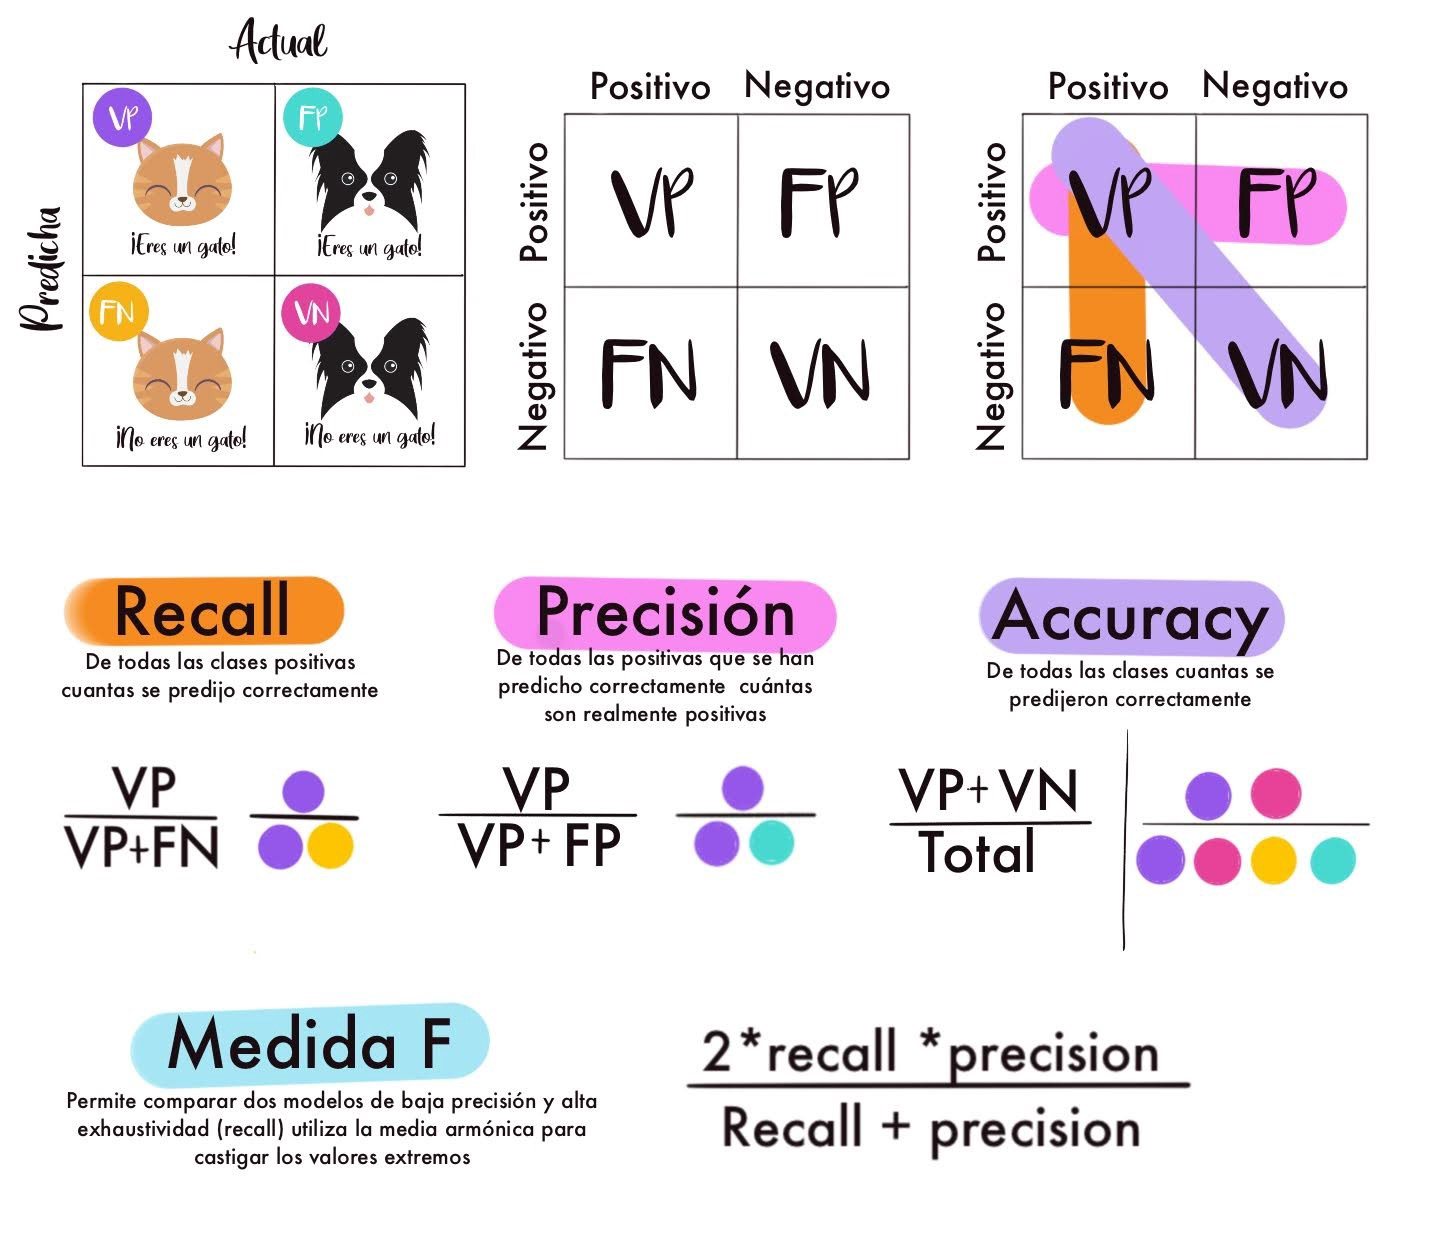

# Generación de predicciones

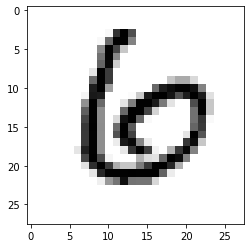

In [65]:
#Se desea clasificar la siguiente imagen
x_test_old = x_test.reshape(10000, 28,28).copy()
plt.imshow(x_test_old[11], cmap=plt.cm.binary)

In [88]:
predictions = model.predict(x_test)

313/313 [==============================] - 2s 7ms/step


El vector de salida se compone de las probabilidades de pertenecer a una de las 10 categorias. La prediccion la transformamos en formato hot enconding para hacer la matriz de confusion

In [89]:
y_predictions = np.array([np.argmax(array) for array in predictions])

In [90]:
y_predictions

array([7, 2, 1, ..., 4, 5, 6])

In [93]:
y_test = np.array([np.argmax(array) for array in y_test])
y_test

array([7, 2, 1, ..., 4, 5, 6])

In [94]:
print(f'y_test {y_test.shape}')
print(f'y_predictions {y_predictions.shape}')

y_test (10000,)
y_predictions (10000,)


In [95]:
result = confusion_matrix(y_test, y_predictions, normalize='pred')

In [ ]:
import seaborn as sns

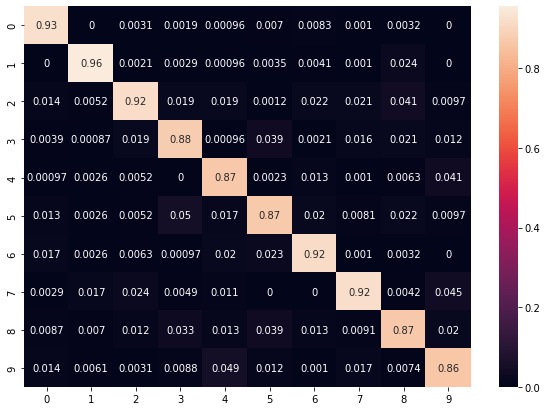

In [97]:
df_cm = pd.DataFrame(result, 
                     index = [i for i in range(10)], 
                     columns = [i for i in range(10)])

plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

## **Tener en cuenta que hasta aquí no se ha hecho nada para evitar el sobre ajuste del modelo, por eso aunque su precisión sea del 90% aun no lo podemos considerar confiable**

# **Redes neuronales convulucionales CNN**